In [1]:
!pip install prophet
!pip install --upgrade jupyter
!pip install --upgrade ipywidgets



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('store.csv', encoding = "latin1") 

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df = df.drop(['Row ID', 'Postal Code', 'Customer Name'], axis=1)

In [12]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [13]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10


EDA(OUTLIER DETECTION AND CORRECTION)

<Axes: xlabel='Sales'>

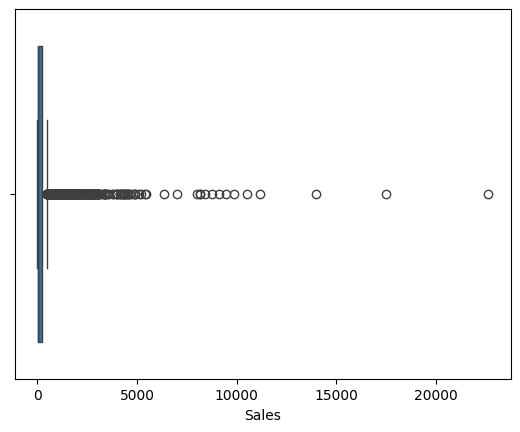

In [14]:
sns.boxplot(x=df['Sales'])

<Axes: xlabel='Profit'>

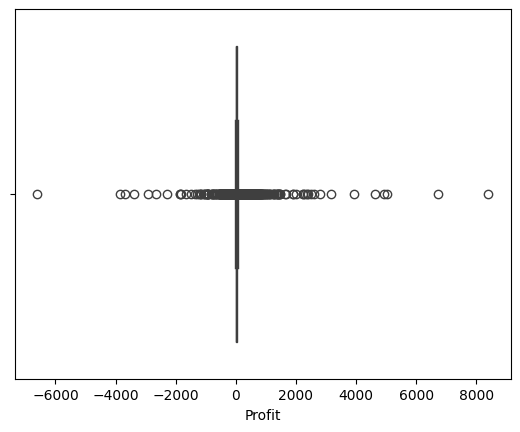

In [15]:
sns.boxplot(x=df['Profit'])

<Axes: xlabel='Sales'>

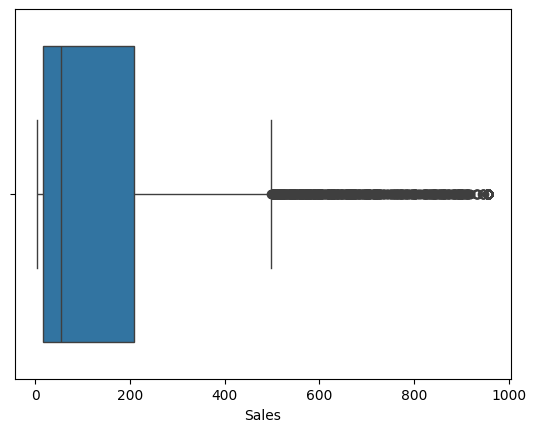

In [16]:
# Calculate the 95th and 5th percentiles
upper_limit = np.percentile(df['Sales'], 95)
lower_limit = np.percentile(df['Sales'], 5)

# Cap values above the 95th percentile and below the 5th percentile
df['Sales'] = np.where(df['Sales'] > upper_limit, upper_limit, df['Sales'])
df['Sales'] = np.where(df['Sales'] < lower_limit, lower_limit, df['Sales'])
sns.boxplot(x=df['Sales'])

<Axes: xlabel='Profit'>

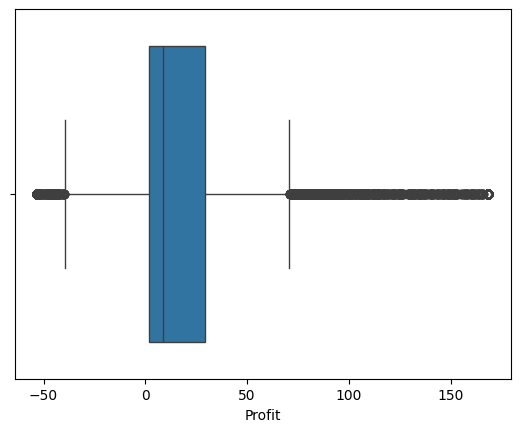

In [17]:
# Calculate the 95th and 5th percentiles
upper_limit = np.percentile(df['Profit'], 95)
lower_limit = np.percentile(df['Profit'], 5)

# Cap values above the 95th percentile and below the 5th percentile
df['Profit'] = np.where(df['Profit'] > upper_limit, upper_limit, df['Profit'])
df['Profit'] = np.where(df['Profit'] < lower_limit, lower_limit, df['Profit'])
sns.boxplot(x=df['Profit'])

EDA(DATA VISUALIZATION)

In [18]:
sales_data = df.groupby('Month')['Sales'].sum().reset_index()
sales_data

,Month,Sales
0,1,66237.752125
1,2,47874.852850
2,3,130201.207955
3,4,107960.625460
4,5,119705.940050
5,6,127168.407610
6,7,123526.737615
7,8,128243.105555
8,9,235969.160495
9,10,136070.057510


MONTHLY SALES ANALYSIS

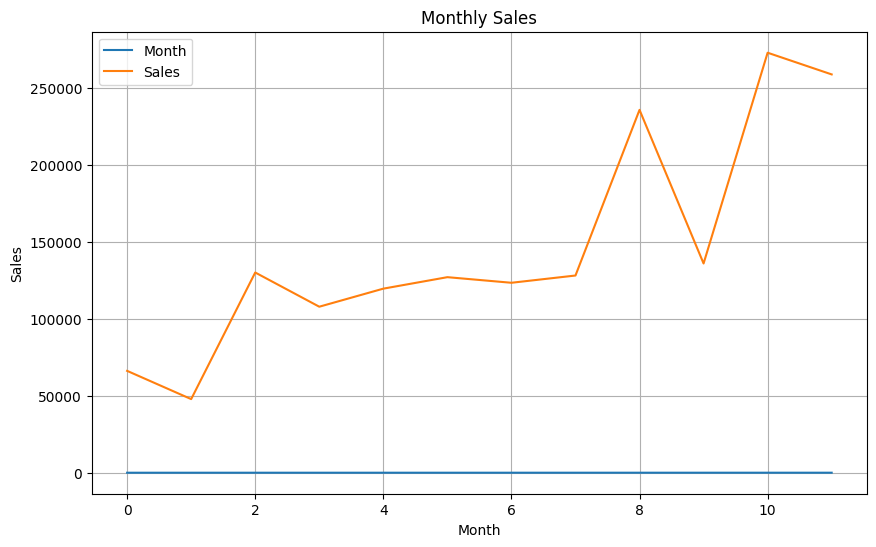

In [19]:
# monthly sales analysis
sales_data.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


SALES ANALYSIS BY CATEGORY

In [20]:
category_data = df.groupby('Category')['Sales'].sum()
category_data

Category
Furniture          616763.011055
Office Supplies    584874.204605
Technology         553473.528040
Name: Sales, dtype: float64

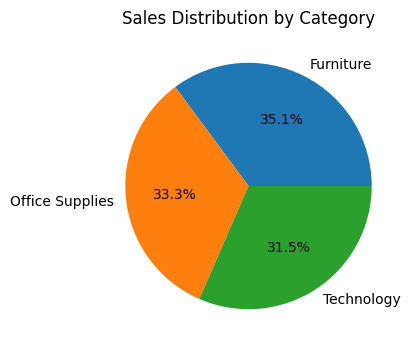

In [21]:
#category sales analysis
category_data.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4))
plt.title('Sales Distribution by Category')
plt.ylabel('')  
plt.show()

SALES ANALYSIS BY SUB-CATEGORY

In [22]:
subcategory_data = df.groupby('Sub-Category')['Sales'].sum()
subcategory_data

Sub-Category
Accessories    149046.459840
Appliances      91874.746635
Art             27108.516245
Binders        130152.485025
Bookcases       90239.761070
Chairs         271533.619090
Copiers         55255.904045
Envelopes       16489.966000
Fasteners        3095.656000
Furnishings     90869.501470
Labels          12533.962000
Machines        68324.897780
Paper           78495.816000
Phones         280846.266375
Storage        203804.812495
Supplies        21318.244205
Tables         164120.129425
Name: Sales, dtype: float64

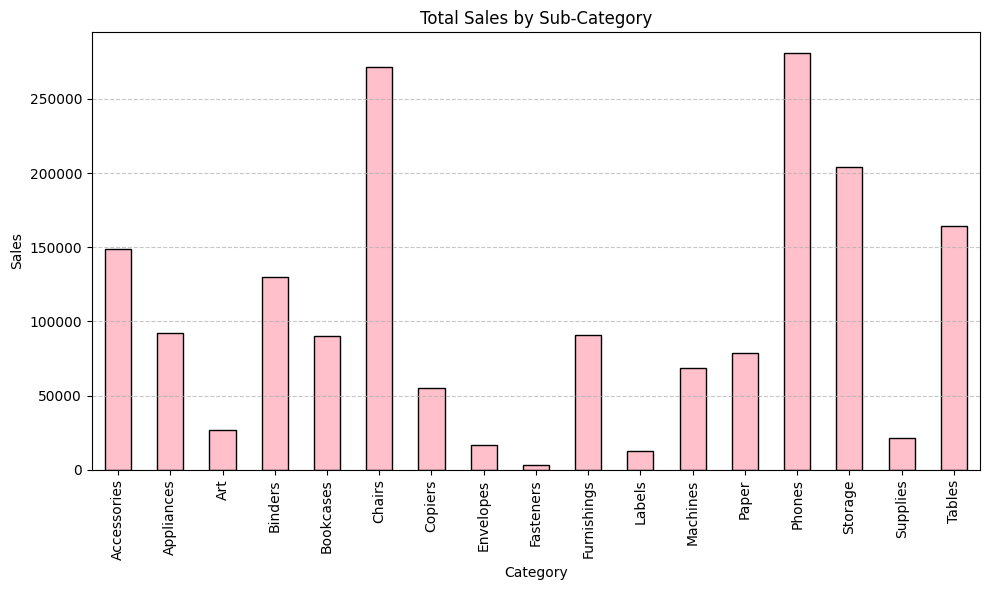

In [23]:
#sub category sales analysis
subcategory_data.plot(
    kind='bar',
    figsize=(10, 6),
    color='pink',
    edgecolor='black'
)
plt.title('Total Sales by Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation= 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Layout thoda adjust karta hai
plt.show()

PROFIT ANALYSIS BY MONTH

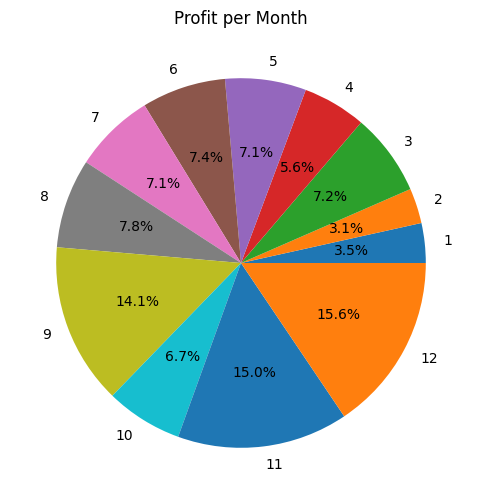

In [24]:
profit_by_month = df.groupby(['Month'])['Profit'].sum()

profit_by_month.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Profit per Month')
plt.ylabel('')  # Pie chart me y-label chahiye nahi hota
plt.show()

MONTHLY PROFIT BASED ON CATEGORY 

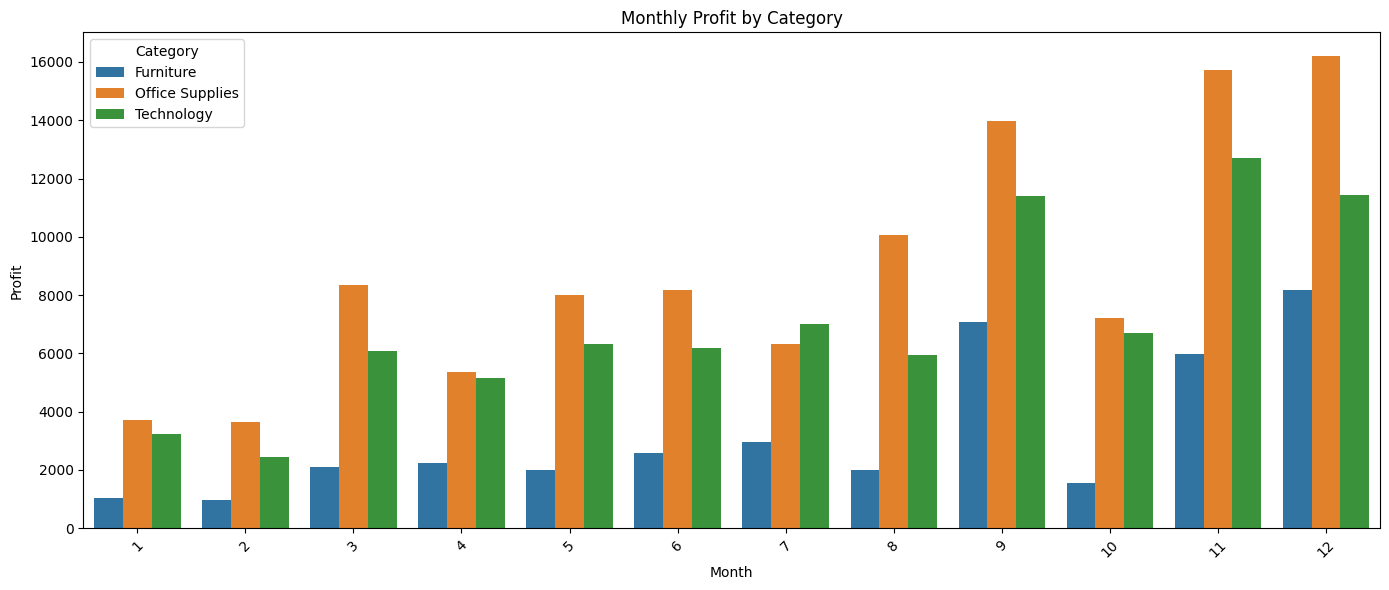

In [25]:
#analyze monthly profit based on category
monthly_profit = df.groupby(['Month', 'Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=monthly_profit, x='Month', y='Profit', hue='Category')
plt.title('Monthly Profit by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

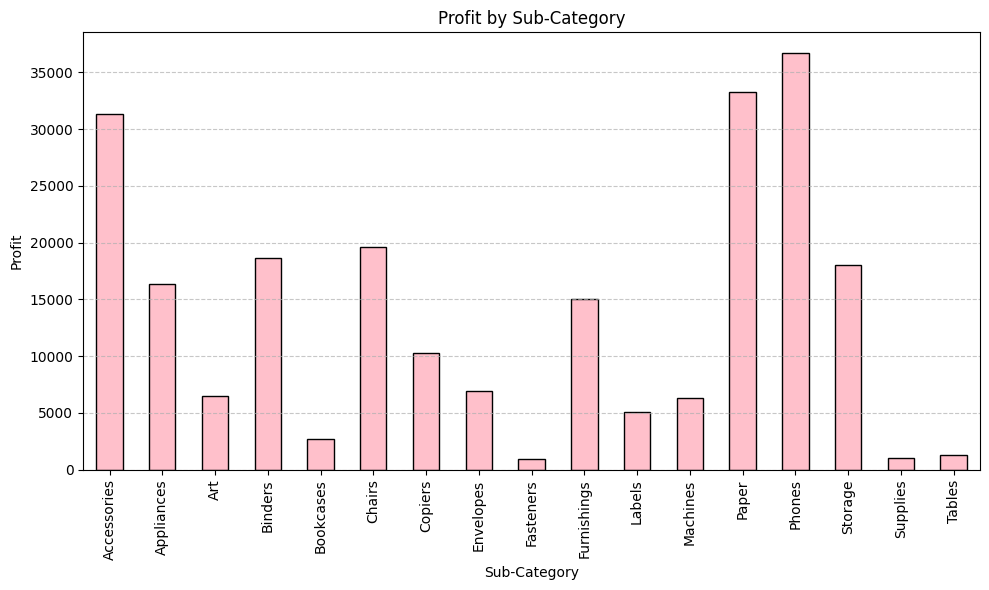

In [26]:
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum()
subcategory_profit.plot(
    kind='bar',
    figsize=(10, 6),
    color='pink',
    edgecolor='black'
)
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation= 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Layout thoda adjust karta hai
plt.show()

CORRELATION MATRIX

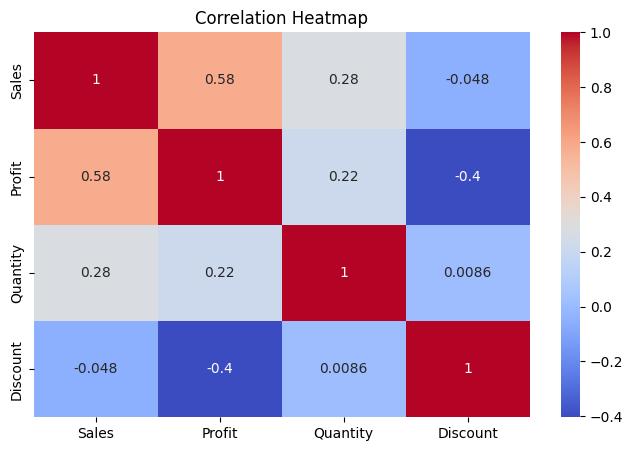

In [27]:
corr = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


TOP 10 PROFITABLE PRODUCTS

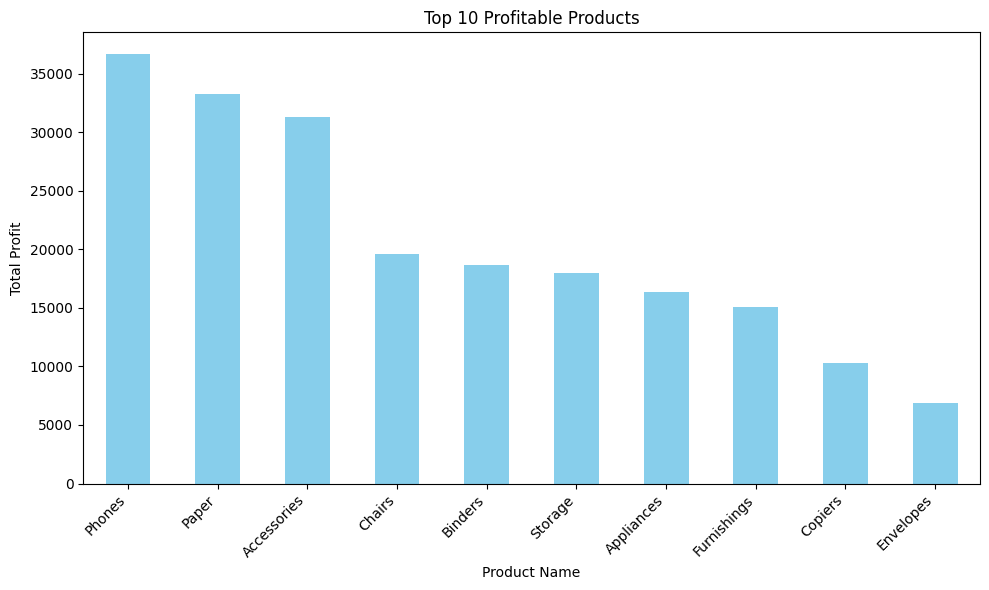

In [28]:
top_products = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

PROFIT BY CUSTOMER SEGMENTS

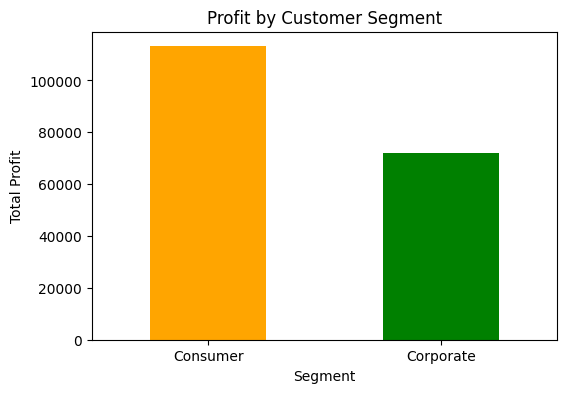

In [29]:
segment_profit = df[df['Segment'].isin(['Consumer', 'Corporate'])].groupby('Segment')['Profit'].sum()

plt.figure(figsize=(6, 4))
segment_profit.plot(kind='bar', color=['orange', 'green'])
plt.title("Profit by Customer Segment")
plt.ylabel("Total Profit")
plt.xlabel("Segment")
plt.xticks(rotation=0)
plt.show()

TRAINING AND TESTING & APPLYING ML MODEL

In [30]:
category_input = input("Enter Category (e.g. Furniture, Technology, Office Supplies): ")


Enter Category (e.g. Furniture, Technology, Office Supplies):  Technology


In [31]:
df_category = df[df['Category'] == category_input]


In [32]:
 #Set 'Order Date' as the index
df_category.set_index('Order Date', inplace=True)

# Now resample the data to monthly frequency and sum the numeric columns
monthly = df_category.resample('ME').sum(numeric_only=True).reset_index()

In [33]:
sales_df = monthly[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})

profit_df = monthly[['Order Date', 'Profit']].rename(columns={'Order Date': 'ds', 'Profit': 'y'})

In [34]:
train = sales_df[:-6]
test = sales_df[-6:]


In [35]:
# Sales model
sales_model = Prophet()
sales_model.fit(sales_df)

# Profit model
profit_model = Prophet()
profit_model.fit(profit_df)



11:19:31 - cmdstanpy - INFO - Chain [1] start processing
11:19:33 - cmdstanpy - INFO - Chain [1] done processing
11:19:33 - cmdstanpy - INFO - Chain [1] start processing
11:19:33 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
future = sales_model.make_future_dataframe(periods=6, freq='ME')


In [37]:
forecast = sales_model.predict(future)
profit_forecast = profit_model.predict(future)


In [38]:
compare = forecast[['ds', 'yhat']].merge(test, on='ds')

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

mae = mean_absolute_error(compare['y'], compare['yhat'])
rmse = np.sqrt(mean_squared_error(compare['y'], compare['yhat']))

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))

    

MAE: 2262.05
RMSE: 2502.56


In [40]:
future_forecast = forecast[forecast['ds'] > sales_df['ds'].max()]
future_profit = profit_forecast[profit_forecast['ds'] > profit_df['ds'].max()]

combined_forecast = pd.DataFrame({
    'Month': future_forecast['ds'].values,
    'Predicted Sales': future_forecast['yhat'].values,
    'Predicted Profit': future_profit['yhat'].values
})

print("\n--- Next 6 Months Forecast ---")
print(combined_forecast.reset_index(drop=True))


--- Next 6 Months Forecast ---
       Month  Predicted Sales  Predicted Profit
0 2018-01-31     10303.490590       1596.567716
1 2018-02-28      8130.622167       1277.522384
2 2018-03-31     14665.166112       2176.836881
3 2018-04-30     13438.454124       2123.618650
4 2018-05-31     14024.968218       2106.742933
5 2018-06-30     13362.241975       2076.009749


In [41]:
past_data = pd.DataFrame({
    'Month': sales_df['ds'].values[-6:],
    'Actual Sales': sales_df['y'].values[-6:],
    'Actual Profit': profit_df['y'].values[-6:]
})

print("\n--- Past 6 Months Data ---")
print(past_data.reset_index(drop=True))



--- Past 6 Months Data ---
       Month  Actual Sales  Actual Profit
0 2017-07-31  16783.701960     2600.28044
1 2017-08-31  12529.063225     1902.86288
2 2017-09-30  23501.974960     3895.98442
3 2017-10-31  15541.310470     1966.84632
4 2017-11-30  28318.067695     3984.55118
5 2017-12-31  17587.017470     3062.48778


SAVE MODEL

In [42]:
import joblib
save_sales = joblib.dump(sales_model, 'sales_model.pkl')
save_profit = joblib.dump(profit_model, 'profit_model.pkl')
print(save_sales)
print(save_profit)

['sales_model.pkl']
['profit_model.pkl']


DEPLOYMENT

In [43]:
!django-admin startproject forecast_project

CommandError: 'C:\Users\Bhakt\Predictions\forecast_project' already exists


In [44]:
cd forecast_project


C:\Users\Bhakt\Predictions\forecast_project


In [45]:
!python manage.py startapp mainapp

CommandError: 'mainapp' conflicts with the name of an existing Python module and cannot be used as an app name. Please try another name.


In [ ]:
!python manage.py runserver

In [49]:
!python manage.py migrate


Operations to perform:
  Apply all migrations: admin, auth, contenttypes, sessions
Running migrations:
  No migrations to apply.


In [48]:
!pip install plotly


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
